In [8]:
import requests
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json

### Reference for api keys 
- https://www.kevinsidwar.com/iot/2017/7/1/the-undocumented-nhl-stats-api

### Objectives for this notebook
- Explore NHL API
- Get a better grasp of descriptive statistics
- Work with Graphical representation of the data
- determine if re-org to class structure is necessary

 

## Schedules API endpoint

In [92]:
response = requests.get('https://statsapi.web.nhl.com/api/v1/schedule?startDate=2016-01-01&endDate=2017-01-02')
response.status_code

200

In [93]:
data = response.json()
data

{'copyright': 'NHL and the NHL Shield are registered trademarks of the National Hockey League. NHL and NHL team marks are the property of the NHL and its teams. © NHL 2018. All Rights Reserved.',
 'dates': [{'date': '2016-01-01',
   'events': [],
   'games': [{'content': {'link': '/api/v1/game/2015020565/content'},
     'gameDate': '2016-01-01T18:00:00Z',
     'gamePk': 2015020565,
     'gameType': 'R',
     'link': '/api/v1/game/2015020565/feed/live',
     'season': '20152016',
     'status': {'abstractGameState': 'Final',
      'codedGameState': '7',
      'detailedState': 'Final',
      'startTimeTBD': False,
      'statusCode': '7'},
     'teams': {'away': {'leagueRecord': {'losses': 15,
        'ot': 3,
        'type': 'league',
        'wins': 22},
       'score': 5,
       'team': {'id': 8,
        'link': '/api/v1/teams/8',
        'name': 'Montréal Canadiens'}},
      'home': {'leagueRecord': {'losses': 13,
        'ot': 4,
        'type': 'league',
        'wins': 20},
      

In [85]:
data.keys()

dict_keys(['copyright', 'totalItems', 'totalEvents', 'totalGames', 'totalMatches', 'wait', 'dates'])

In [77]:
def games_per_day(startdate, enddate):
    '''
    pass in json data from nhl API to return the number of games played on each day.
    each day is a list item 
    '''
    
    response = requests.get('https://statsapi.web.nhl.com/api/v1/schedule?startDate='+startdate+'&endDate='+enddate)
    data = response.json()
    
    games_day = {}
    for i in data['dates']:
        days = [x['teams'] for x in i['games'][0:]]
        games = [x for x in days]
        games_day[i['date']] = len(games)

    games_per_day = pd.Series(games_day, index=games_day.keys())
    return games_per_day

games_per_day = games_per_day(startdate='2017-12-30', enddate='2018-01-02')

In [82]:
games_per_day.keys

<bound method Series.keys of 2017-12-30     6
2017-12-31     8
2018-01-01     1
2018-01-02    12
dtype: int64>

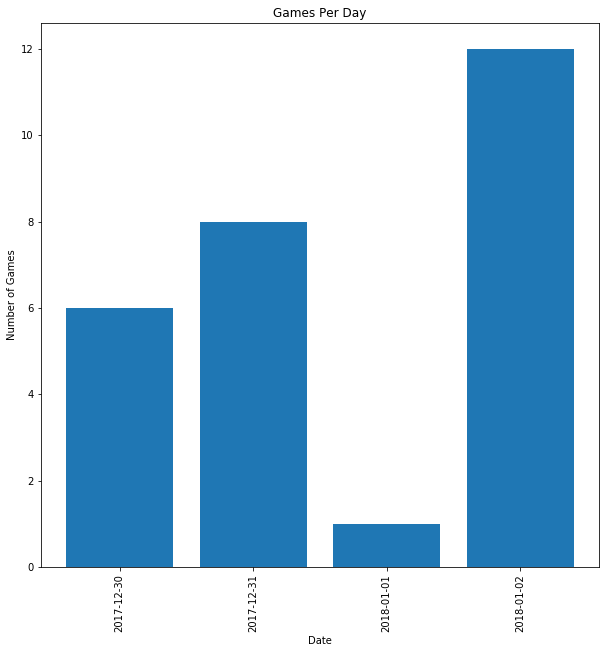

In [78]:
fig = plt.figure(figsize=(10,10))
plt.bar(games_per_day.index, games_per_day[-30:].values)
plt.title('Games Per Day')
plt.xlabel('Date')
plt.ylabel('Number of Games')
plt.xticks(rotation=90)
plt.show()

## Team API endpoint

In [4]:
teams = requests.get('https://statsapi.web.nhl.com/api/v1/teams')
player = teams.json()
# player['teams']

for i in player['teams']:
    for k,v in i.items():
        print(k, v)
    print()    

id 1
name New Jersey Devils
link /api/v1/teams/1
venue {'name': 'Prudential Center', 'link': '/api/v1/venues/null', 'city': 'Newark', 'timeZone': {'id': 'America/New_York', 'offset': -5, 'tz': 'EST'}}
abbreviation NJD
teamName Devils
locationName New Jersey
firstYearOfPlay 1982
division {'id': 18, 'name': 'Metropolitan', 'link': '/api/v1/divisions/18'}
conference {'id': 6, 'name': 'Eastern', 'link': '/api/v1/conferences/6'}
franchise {'franchiseId': 23, 'teamName': 'Devils', 'link': '/api/v1/franchises/23'}
shortName New Jersey
officialSiteUrl http://www.truesince82.com
franchiseId 23
active True

id 2
name New York Islanders
link /api/v1/teams/2
venue {'name': 'Barclays Center', 'link': '/api/v1/venues/null', 'city': 'Brooklyn', 'timeZone': {'id': 'America/New_York', 'offset': -5, 'tz': 'EST'}}
abbreviation NYI
teamName Islanders
locationName New York
firstYearOfPlay 1972
division {'id': 18, 'name': 'Metropolitan', 'link': '/api/v1/divisions/18'}
conference {'id': 6, 'name': 'Eastern'

## Game API endpoint

- Has player id, player info, etc.

- game data feed keys
  - copyright
  - gamePk
  - link
  - metaData
  - gameData 
  - liveData

In [106]:
response = requests.get('https://statsapi.web.nhl.com/api/v1/schedule?startDate=2016-10-01&endDate=2017-06-01')
data = response.json()
    
games_day = {}
for i in data['dates']:
    days = [x['gamePk'] for x in i['games'][0:]]
    print(i['date'], days)
    print()

2016-10-01 [2016010053, 2016010051, 2016010052, 2016010054, 2016010050, 2016010049, 2016010048]

2016-10-02 [2016010060, 2016010057, 2016010061, 2016010058, 2016010062, 2016010055, 2016010063, 2016010059, 2016010056]

2016-10-03 [2016010064, 2016010065, 2016010067, 2016010068, 2016010066]

2016-10-04 [2016010069, 2016010074, 2016010076, 2016010075, 2016010070, 2016010072, 2016010071, 2016010073, 2016010077]

2016-10-05 [2016010079, 2016010081, 2016010082, 2016010084, 2016010080, 2016010078, 2016010083]

2016-10-06 [2016010085, 2016010089, 2016010088, 2016010086, 2016010090]

2016-10-07 [2016010095, 2016010092, 2016010094, 2016010091, 2016010093]

2016-10-08 [2016010102, 2016010096, 2016010097, 2016010104, 2016010099, 2016010101, 2016010103, 2016010098, 2016010100]

2016-10-09 [2016010106, 2016010105]

2016-10-12 [2016020001, 2016020002, 2016020003, 2016020004]

2016-10-13 [2016020005, 2016020006, 2016020008, 2016020009, 2016020010, 2016020011, 2016020012, 2016020007, 2016020013]

2016-

- Preseason dates are year01[0-9]{4}     type "PR"
- Regular Season dates are year02[0-9]{4}    type "R"
- Post Season dates are year03[0-9]{4} type "P"

In [115]:
game2015010002 = requests.get('https://statsapi.web.nhl.com/api/v1/game/2016030111/feed/live')
game2015010002_data = game2015010002.json()
game2015010002_data

{'copyright': 'NHL and the NHL Shield are registered trademarks of the National Hockey League. NHL and NHL team marks are the property of the NHL and its teams. © NHL 2018. All Rights Reserved.',
 'gameData': {'datetime': {'dateTime': '2017-04-12T23:00:00Z',
   'endDateTime': '2017-04-13T01:41:46Z'},
  'game': {'pk': 2016030111, 'season': '20162017', 'type': 'P'},
  'players': {'ID8467496': {'active': False,
    'birthCity': 'Voskresensk',
    'birthCountry': 'RUS',
    'birthDate': '1978-12-20',
    'firstName': 'Andrei',
    'fullName': 'Andrei Markov',
    'height': '6\' 0"',
    'id': 8467496,
    'lastName': 'Markov',
    'link': '/api/v1/people/8467496',
    'nationality': 'RUS',
    'primaryNumber': '79',
    'primaryPosition': {'abbreviation': 'D',
     'code': 'D',
     'name': 'Defenseman',
     'type': 'Defenseman'},
    'rookie': False,
    'rosterStatus': 'Y',
    'shootsCatches': 'L',
    'weight': 200},
   'ID8468505': {'active': False,
    'birthCity': 'Summerside',
   

game2015010002_data.keys()

In [112]:
game2015010002_data['gameData']

{'datetime': {'dateTime': '2017-04-12T23:00:00Z',
  'endDateTime': '2017-04-13T01:41:46Z'},
 'game': {'pk': 2016030111, 'season': '20162017', 'type': 'P'},
 'players': {'ID8467496': {'active': False,
   'birthCity': 'Voskresensk',
   'birthCountry': 'RUS',
   'birthDate': '1978-12-20',
   'firstName': 'Andrei',
   'fullName': 'Andrei Markov',
   'height': '6\' 0"',
   'id': 8467496,
   'lastName': 'Markov',
   'link': '/api/v1/people/8467496',
   'nationality': 'RUS',
   'primaryNumber': '79',
   'primaryPosition': {'abbreviation': 'D',
    'code': 'D',
    'name': 'Defenseman',
    'type': 'Defenseman'},
   'rookie': False,
   'rosterStatus': 'Y',
   'shootsCatches': 'L',
   'weight': 200},
  'ID8468505': {'active': False,
   'birthCity': 'Summerside',
   'birthCountry': 'CAN',
   'birthDate': '1982-08-19',
   'birthStateProvince': 'PE',
   'firstName': 'Steve',
   'fullName': 'Steve Ott',
   'height': '6\' 0"',
   'id': 8468505,
   'lastName': 'Ott',
   'link': '/api/v1/people/846850

In [42]:
game2015010002_data['gameData'].keys()

dict_keys(['game', 'datetime', 'status', 'teams', 'players', 'venue'])

### Player Data
- player info

In [43]:
game2015010002_data['gameData']['players']

{'ID8448208': {'active': False,
  'birthCity': 'Kladno',
  'birthCountry': 'CZE',
  'birthDate': '1972-02-15',
  'firstName': 'Jaromir',
  'fullName': 'Jaromir Jagr',
  'height': '6\' 3"',
  'id': 8448208,
  'lastName': 'Jagr',
  'link': '/api/v1/people/8448208',
  'nationality': 'CZE',
  'primaryNumber': '68',
  'primaryPosition': {'abbreviation': 'RW',
   'code': 'R',
   'name': 'Right Wing',
   'type': 'Forward'},
  'rookie': False,
  'rosterStatus': 'Y',
  'shootsCatches': 'L',
  'weight': 230},
 'ID8462118': {'active': False,
  'birthCity': 'Ottawa',
  'birthCountry': 'CAN',
  'birthDate': '1977-07-17',
  'birthStateProvince': 'ON',
  'firstName': 'Marc',
  'fullName': 'Marc Savard',
  'height': '5\' 10"',
  'id': 8462118,
  'lastName': 'Savard',
  'link': '/api/v1/people/8462118',
  'nationality': 'CAN',
  'primaryPosition': {'abbreviation': 'C',
   'code': 'C',
   'name': 'Center',
   'type': 'Forward'},
  'rookie': False,
  'rosterStatus': 'I',
  'shootsCatches': 'L',
  'weight

In [44]:
for k,v  in game2015010002_data['gameData']['players'].items():
    print(k, v)
    print()

ID8469638 {'id': 8469638, 'fullName': 'Jussi Jokinen', 'link': '/api/v1/people/8469638', 'firstName': 'Jussi', 'lastName': 'Jokinen', 'primaryNumber': '36', 'birthDate': '1983-04-01', 'currentAge': 34, 'birthCity': 'Kalajoki', 'birthCountry': 'FIN', 'nationality': 'FIN', 'height': '5\' 11"', 'weight': 198, 'active': True, 'alternateCaptain': False, 'captain': False, 'rookie': False, 'shootsCatches': 'L', 'rosterStatus': 'Y', 'currentTeam': {'id': 22, 'name': 'Edmonton Oilers', 'link': '/api/v1/teams/22', 'triCode': 'EDM'}, 'primaryPosition': {'code': 'L', 'name': 'Left Wing', 'type': 'Forward', 'abbreviation': 'LW'}}

ID8468700 {'id': 8468700, 'fullName': 'Paul Gaustad', 'link': '/api/v1/people/8468700', 'firstName': 'Paul', 'lastName': 'Gaustad', 'primaryNumber': '28', 'birthDate': '1982-02-03', 'birthCity': 'Fargo', 'birthStateProvince': 'ND', 'birthCountry': 'USA', 'nationality': 'USA', 'height': '6\' 5"', 'weight': 227, 'active': False, 'rookie': False, 'shootsCatches': 'L', 'roste

### Live Game Data

In [45]:
game2015010002_data['liveData']

{'boxscore': {'officials': [{'official': {'fullName': 'Tim Peel',
     'id': 2071,
     'link': '/api/v1/people/2071'},
    'officialType': 'Referee'},
   {'official': {'fullName': 'Evgeny Romasko',
     'id': 6767,
     'link': '/api/v1/people/6767'},
    'officialType': 'Referee'},
   {'official': {'fullName': 'Andy McElman',
     'id': 2269,
     'link': '/api/v1/people/2269'},
    'officialType': 'Linesman'},
   {'official': {'fullName': 'Bryan Pancich',
     'id': 6007,
     'link': '/api/v1/people/6007'},
    'officialType': 'Linesman'}],
  'teams': {'away': {'coaches': [{'person': {'fullName': 'Gerard Gallant',
       'link': '/api/v1/people/null'},
      'position': {'abbreviation': 'Head Coach',
       'code': 'HC',
       'name': 'Head Coach',
       'type': 'Head Coach'}}],
    'goalies': [8470093, 8478375],
    'onIce': [],
    'onIcePlus': [],
    'penaltyBox': [],
    'players': {'ID8448208': {'jerseyNumber': '68',
      'person': {'fullName': 'Jaromir Jagr',
       'id':

In [46]:
game2015010002_data['liveData'].keys()

dict_keys(['plays', 'linescore', 'boxscore', 'decisions'])

In [47]:
game2015010002_data['liveData']['boxscore']

{'officials': [{'official': {'fullName': 'Tim Peel',
    'id': 2071,
    'link': '/api/v1/people/2071'},
   'officialType': 'Referee'},
  {'official': {'fullName': 'Evgeny Romasko',
    'id': 6767,
    'link': '/api/v1/people/6767'},
   'officialType': 'Referee'},
  {'official': {'fullName': 'Andy McElman',
    'id': 2269,
    'link': '/api/v1/people/2269'},
   'officialType': 'Linesman'},
  {'official': {'fullName': 'Bryan Pancich',
    'id': 6007,
    'link': '/api/v1/people/6007'},
   'officialType': 'Linesman'}],
 'teams': {'away': {'coaches': [{'person': {'fullName': 'Gerard Gallant',
      'link': '/api/v1/people/null'},
     'position': {'abbreviation': 'Head Coach',
      'code': 'HC',
      'name': 'Head Coach',
      'type': 'Head Coach'}}],
   'goalies': [8470093, 8478375],
   'onIce': [],
   'onIcePlus': [],
   'penaltyBox': [],
   'players': {'ID8448208': {'jerseyNumber': '68',
     'person': {'fullName': 'Jaromir Jagr',
      'id': 8448208,
      'link': '/api/v1/people/8

In [48]:
game2015010002_data['liveData']['plays']

{'allPlays': [{'about': {'dateTime': '2015-09-20T19:08:29Z',
    'eventId': 1,
    'eventIdx': 0,
    'goals': {'away': 0, 'home': 0},
    'ordinalNum': '1st',
    'period': 1,
    'periodTime': '00:00',
    'periodTimeRemaining': '00:00',
    'periodType': 'REGULAR'},
   'coordinates': {},
   'result': {'description': 'Game Scheduled',
    'event': 'Game Scheduled',
    'eventCode': 'NSH1',
    'eventTypeId': 'GAME_SCHEDULED'}},
  {'about': {'dateTime': '2015-09-20T20:36:42Z',
    'eventId': 2,
    'eventIdx': 1,
    'goals': {'away': 0, 'home': 0},
    'ordinalNum': '1st',
    'period': 1,
    'periodTime': '00:00',
    'periodTimeRemaining': '00:00',
    'periodType': 'REGULAR'},
   'coordinates': {},
   'result': {'description': 'Period Ready',
    'event': 'Period Ready',
    'eventCode': 'NSH2',
    'eventTypeId': 'PERIOD_READY'}},
  {'about': {'dateTime': '2015-09-20T20:38:24Z',
    'eventId': 5,
    'eventIdx': 2,
    'goals': {'away': 0, 'home': 0},
    'ordinalNum': '1st',
  

In [63]:
game2015010002_data['liveData']['plays'].keys()


dict_keys(['allPlays', 'scoringPlays', 'penaltyPlays', 'playsByPeriod', 'currentPlay'])

In [64]:
game2015010002_data['liveData']['plays']['allPlays']

[{'about': {'dateTime': '2015-09-20T19:08:29Z',
   'eventId': 1,
   'eventIdx': 0,
   'goals': {'away': 0, 'home': 0},
   'ordinalNum': '1st',
   'period': 1,
   'periodTime': '00:00',
   'periodTimeRemaining': '00:00',
   'periodType': 'REGULAR'},
  'coordinates': {},
  'result': {'description': 'Game Scheduled',
   'event': 'Game Scheduled',
   'eventCode': 'NSH1',
   'eventTypeId': 'GAME_SCHEDULED'}},
 {'about': {'dateTime': '2015-09-20T20:36:42Z',
   'eventId': 2,
   'eventIdx': 1,
   'goals': {'away': 0, 'home': 0},
   'ordinalNum': '1st',
   'period': 1,
   'periodTime': '00:00',
   'periodTimeRemaining': '00:00',
   'periodType': 'REGULAR'},
  'coordinates': {},
  'result': {'description': 'Period Ready',
   'event': 'Period Ready',
   'eventCode': 'NSH2',
   'eventTypeId': 'PERIOD_READY'}},
 {'about': {'dateTime': '2015-09-20T20:38:24Z',
   'eventId': 5,
   'eventIdx': 2,
   'goals': {'away': 0, 'home': 0},
   'ordinalNum': '1st',
   'period': 1,
   'periodTime': '00:00',
   'p

In [68]:
game2015010002_data['liveData']['plays']['currentPlay']

{'about': {'dateTime': '2015-09-20T23:06:05Z',
  'eventId': 632,
  'eventIdx': 280,
  'goals': {'away': 2, 'home': 5},
  'ordinalNum': '3rd',
  'period': 3,
  'periodTime': '20:00',
  'periodTimeRemaining': '00:00',
  'periodType': 'REGULAR'},
 'coordinates': {},
 'result': {'description': 'Game End',
  'event': 'Game End',
  'eventCode': 'NSH632',
  'eventTypeId': 'GAME_END'}}

In [49]:
game2015010002_data['liveData']['linescore']

{'currentPeriod': 3,
 'currentPeriodOrdinal': '3rd',
 'currentPeriodTimeRemaining': 'Final',
 'hasShootout': False,
 'intermissionInfo': {'inIntermission': False,
  'intermissionTimeElapsed': 0,
  'intermissionTimeRemaining': 0},
 'periods': [{'away': {'goals': 0, 'rinkSide': 'right', 'shotsOnGoal': 3},
   'endTime': '2015-09-20T21:17:02Z',
   'home': {'goals': 2, 'rinkSide': 'left', 'shotsOnGoal': 9},
   'num': 1,
   'ordinalNum': '1st',
   'periodType': 'REGULAR',
   'startTime': '2015-09-20T20:38:24Z'},
  {'away': {'goals': 0, 'rinkSide': 'left', 'shotsOnGoal': 11},
   'endTime': '2015-09-20T22:08:35Z',
   'home': {'goals': 1, 'rinkSide': 'right', 'shotsOnGoal': 10},
   'num': 2,
   'ordinalNum': '2nd',
   'periodType': 'REGULAR',
   'startTime': '2015-09-20T21:35:28Z'},
  {'away': {'goals': 2, 'rinkSide': 'right', 'shotsOnGoal': 8},
   'endTime': '2015-09-20T23:02:10Z',
   'home': {'goals': 2, 'rinkSide': 'left', 'shotsOnGoal': 10},
   'num': 3,
   'ordinalNum': '3rd',
   'periodTy

In [50]:
game2015010002_data['liveData']['decisions']

{'firstStar': {'fullName': 'Filip Forsberg',
  'id': 8476887,
  'link': '/api/v1/people/8476887'},
 'secondStar': {'fullName': 'Ryan Ellis',
  'id': 8475176,
  'link': '/api/v1/people/8475176'},
 'thirdStar': {'fullName': 'Roman Josi',
  'id': 8474600,
  'link': '/api/v1/people/8474600'}}